In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fitness_function(x):
    return -(x**2 - 4*x + 4)

In [3]:
x_min, x_max = -10, 10
population_size = 50
max_generations = 100
crossover_rate = 0.8
mutation_rate = 0.1
population = np.random.uniform(x_min, x_max, size=population_size)

In [4]:
for generation in range(max_generations):
    fitness_scores = fitness_function(population)
    selected_indices = np.random.choice(population_size, size=population_size, p=fitness_scores / sum(fitness_scores))
    crossover_indices = np.random.choice(population_size, size=int(crossover_rate * population_size), replace=False)
    offspring = population.copy()
    offspring[crossover_indices] = population[selected_indices][crossover_indices]
    mutation_indices = np.random.choice(population_size, size=int(mutation_rate * population_size), replace=False)
    offspring[mutation_indices] += np.random.uniform(-1, 1, size=len(mutation_indices))
    population = np.concatenate([population, offspring])
    sorted_indices = np.argsort(fitness_scores)[::-1]
    population = population[sorted_indices[:population_size]]


In [5]:
best_solution = population[np.argmax(fitness_function(population))]
best_fitness = fitness_function(best_solution)

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

Best Solution: 2.4172130035472783
Best Fitness: -0.1740666903289414


In [6]:
x_values = np.linspace(x_min, x_max, 1000)
y_values = fitness_function(x_values)

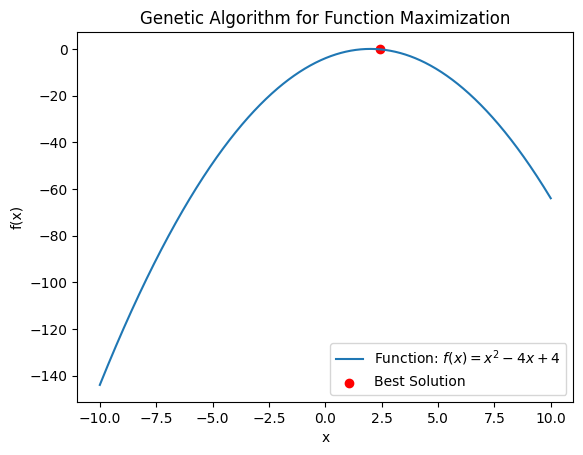

In [7]:
plt.plot(x_values, y_values, label='Function: $f(x) = x^2 - 4x + 4$')
plt.scatter(best_solution, best_fitness, color='red', label='Best Solution')
plt.title('Genetic Algorithm for Function Maximization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()